✅ Available spatial library IDs:
dict_keys(['CID4290', 'is_single'])


100%|██████████| 4992/4992 [00:51<00:00, 96.13/s] 


Fitting CellPie ...
Adding factor values to adata.obs ...


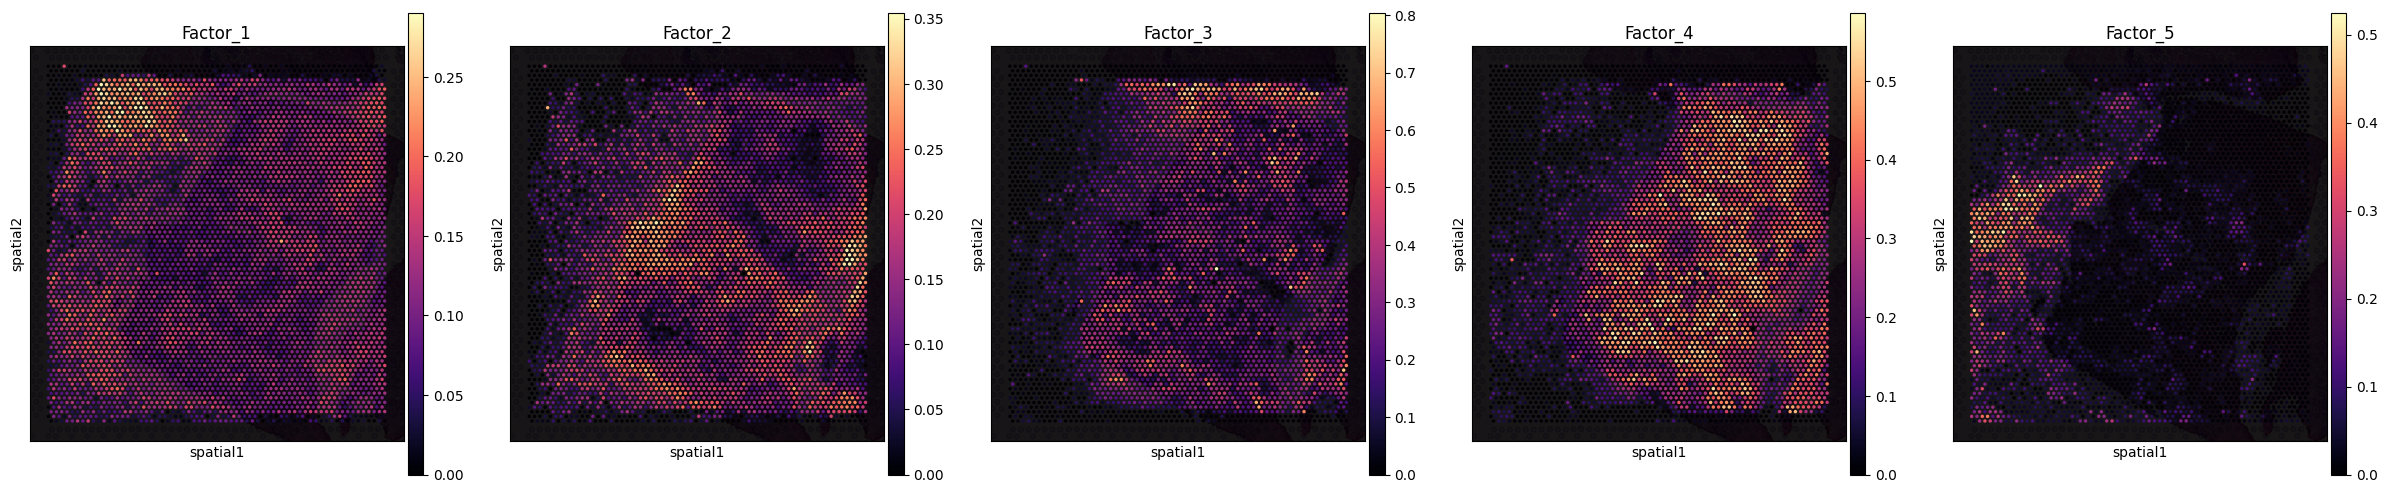

✅ Results saved: 'breast_cellpie_factors.csv' and 'breast_cellpie_output.h5ad'


In [2]:
# ✅ 0. Setup
import scanpy as sc
import squidpy as sq
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.metrics import mean_squared_error
from cellpie_main import intNMF
from cp_utils import preprocess_data_visium  # we will use sc.pl.spatial directly instead of plot_topic_proportions

# ✅ 1. Load the Breast dataset (.h5ad)
adata = sc.read_h5ad("CID4290.h5ad")  # ✅ Ensure this file is present in your working directory

# ✅ 2. Print and select correct library ID
print("✅ Available spatial library IDs:")
print(adata.uns["spatial"].keys())

# ✅ 3. Manually set correct library ID (as printed from above)
library_id = "CID4290"

# ✅ 4. Create Squidpy ImageContainer from the high-res image
img = sq.im.ImageContainer(
    adata.uns["spatial"][library_id]["images"]["hires"],
    scale=adata.uns["spatial"][library_id]["scalefactors"]["tissue_hires_scalef"]
)

# ✅ 5. Extract image features
sq.im.calculate_image_features(
    adata,
    img,
    features="summary",
    key_added="features",
    library_id=library_id
)

# ✅ 6. Preprocess gene + image data
adata = preprocess_data_visium(adata)

# ✅ 7. Run CellPie integrative NMF
model = intNMF(adata, n_topics=5, epochs=30, init="random")
model.fit(adata)

# ✅ 8. Visualize spatial topic clustering directly with Scanpy
with mpl.rc_context({'figure.figsize': (5, 6), 'axes.facecolor': 'black'}):
    sc.pl.spatial(
        adata,
        color=[f"Factor_{i+1}" for i in range(5)],
        library_id=library_id,
        img_key='hires',
        cmap='magma',
        size=1,
        ncols=5,
        alpha_img=0.1
    )

# ✅ 9. Save results to disk
adata.obs[[f"Factor_{i+1}" for i in range(5)]].to_csv("breast_cellpie_factors.csv")
adata.write("breast_cellpie_output.h5ad")
print("✅ Results saved: 'breast_cellpie_factors.csv' and 'breast_cellpie_output.h5ad'")